**TITLE: CAR PRICE PREDICTION USING BASED ON DIFFERENT CHARACTERSTICS OF A CAR** 

**INTRODUCTION**

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. Here we will be using linear regression for prediction which is one of the most widely used Supervised ML algorithm.

Linear Regression is a linear approach to model the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.

**OBJECTIVES**

Here, our main objective is to 

a) To understand the factors affecting the pricing of cars in the American market.

b) To predict the price of car based on the other factors affecting the pricing of cars in the American market.

**BUSINESS GOAL**

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

**PACKAGES AND LIBRARIES**

In [ ]:
#Loading the pandas and numpy that will be used to handle the data.
import pandas as pd
import numpy as np

#Loading matplotlib and seaborn which is required to perform the exploratory data analysis.
import seaborn as sns 
import matplotlib.pyplot as plt

**DATA DESCRIPTION**

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They want to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Hence the data has been drafted by a chinese company about the different categories of cars they manufactured and have been used for the prediction purpose.

The dataset consists of records of 205 cars. the different variables used for buiding the regression model from the dataset are:

**Depentent variable-**
y: price, denotes the price of the car.    
**Independent variable-**         
x1: carlength, denotes the length of the car.        
x2: carwidth,  denotes the width of the car.                            
x3: enginesize, denotes the size od the car engine.                      
x4: horsepower, denotes the total horsepower of a car                  
x5: citympg, denotes the mpg of car in city.           
             


In [ ]:
#Loading the required dataset.
car=pd.read_csv("/content/CarPrice.csv")

#Viewing 'car' data set.
car

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


**EXPLORATORY DATA ANALYSIS**

In [ ]:
#Obtaining the dimension of the dataset.
car.shape

(205, 26)

It is observed that the dataset comprises of 205 records and 26 columns(variables) which are described in the data description. 

In [ ]:
#Using info() function to understand if ther is any null values in the dataset.
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

From the above table it is observed that there does not exist any null value in the dataset hence we can further proceed with the analysis.

In [ ]:
#Obtaining the descriptive measure using describe() function
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Thus, from the above summary we can make out that maximum car length among all the cars is 208.100000, It is also observed that the average horsepwer of cars is 104.117073, also the maximum horse power of a car among all the cars is 288. On similar lines we can draw meaningful insights about the other variables using the summary table.

Since, our main objective is to build a multiple linear regression model to predict the car price for the given characterstics of car of an chinese automobile company. Therefore, we will obtain the visualization of the variables we are interested in. The model is Y = β0 + β1*X1 + β2*X2 + β3*X3 + β4*X4 + β5*X5 + ε

In [ ]:
#Dropping the variables from the daataset which is not needed.
car_N=car.drop(['highwaympg','compressionratio','stroke','carheight','enginelocation','drivewheel','symboling','carbody','doornumber','aspiration','car_ID','CarName','fueltype','carbody','enginelocation','wheelbase','curbweight','boreratio','peakrpm','enginetype','cylindernumber','fuelsystem'],axis=1)

#Segeregating the variables into x and y i.e. independent and dependent variable.
x=car_N.drop("price",axis=1)
y=car["price"]

In [ ]:
#Displaying all the independent variables.
x

,carlength,carwidth,enginesize,horsepower,citympg
0,168.8,64.1,130,111,21
1,168.8,64.1,130,111,21
2,171.2,65.5,152,154,19
3,176.6,66.2,109,102,24
4,176.6,66.4,136,115,18
...,...,...,...,...,...
200,188.8,68.9,141,114,23
201,188.8,68.8,141,160,19
202,188.8,68.9,173,134,18
203,188.8,68.9,145,106,26


In [ ]:
#Displaying the dependent variable Car price.
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [ ]:
#Obtaining the correalation matrix of all the variable in interest.
car_N.corr()

,carlength,carwidth,enginesize,horsepower,citympg,price
carlength,1.000000,0.841118,0.683360,0.552623,-0.670909,0.682920
carwidth,0.841118,1.000000,0.735433,0.640732,-0.642704,0.759325
enginesize,0.683360,0.735433,1.000000,0.809769,-0.653658,0.874145
horsepower,0.552623,0.640732,0.809769,1.000000,-0.801456,0.808139
citympg,-0.670909,-0.642704,-0.653658,-0.801456,1.000000,-0.685751
price,0.682920,0.759325,0.874145,0.808139,-0.685751,1.000000


Thus, it is observed that among all the independent variables the engine size is highly positively related to the car price with coefficient of correlation 0.874145, which means that bigger the size of the engine higher is the car price and also it is observed that the mpg of car in city has highly negative correlation with car price coefficient of correlation -0.685751, that means lesser the mpg of car in city higher is the car price.	

Text(0.5, 1.0, '[Figure 1]')

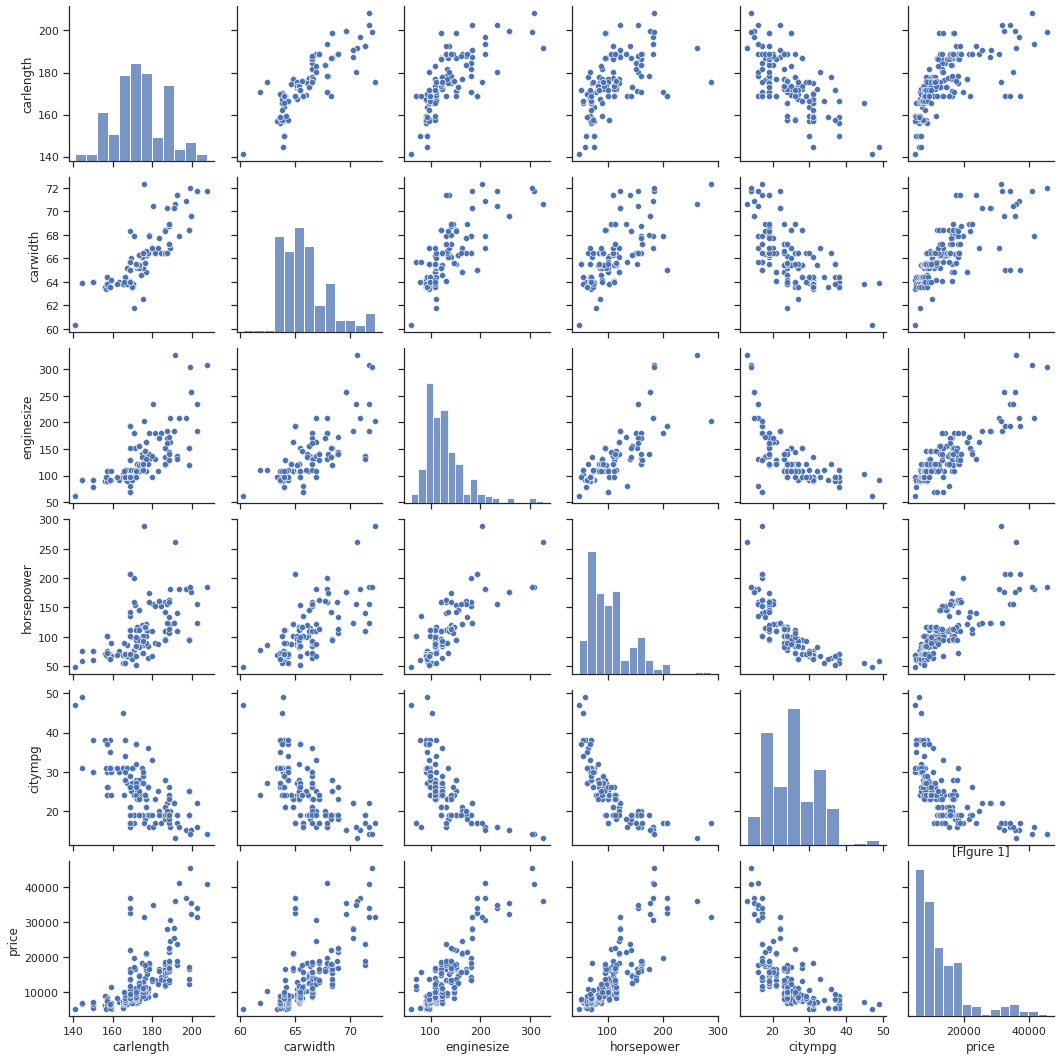

In [ ]:
#Obtaining the scatterplot matrix for all the variables under study.
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(car_N)
plt.title('[Figure 1]')

From the scatter plot (Figure 1) also we can make the same conclusion as above it is observed thatall the independent variables are having highly positive relationship with car price except the mpg of car in city which is having a highly negative relationship with car price.

Text(0, 0.5, 'Price')

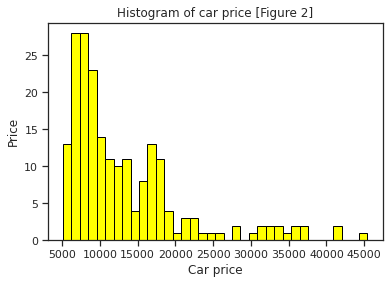

In [ ]:
#histogram for car price
plt.hist(y, color = 'yellow', edgecolor = 'black',
         bins = int(180/5))
# Adding labels
plt.title('Histogram of car price [Figure 2]')
plt.xlabel('Car price')
plt.ylabel('Price')

Thus, from the above histogram (Figure 2) it is observed that the data of the car price is rightly skewed.

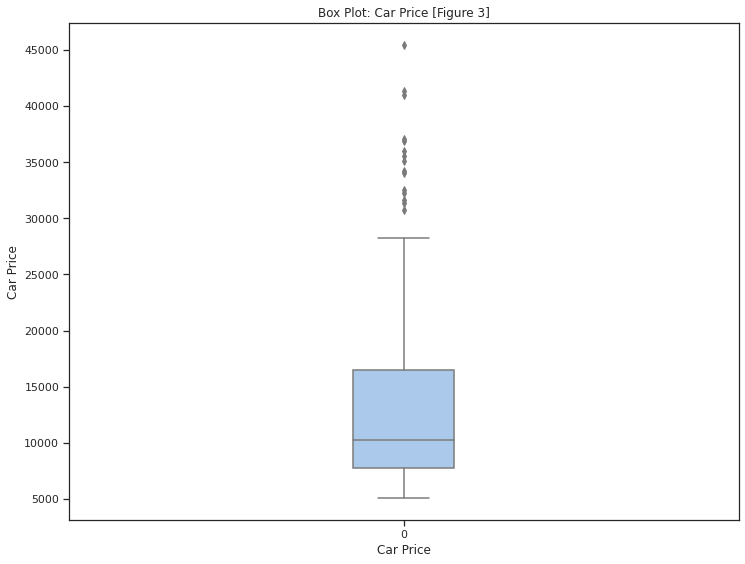

In [ ]:
#Plotting a box plot for Price.
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(122)
sns.boxplot(data=car_N['price'],palette='pastel',width=0.15,ax=ax)
ax.set_title('Box Plot: Car Price [Figure 3]')
ax.set_xlabel('Car Price')
ax.set_ylabel('Car Price')
plt.tight_layout()
plt.show()

Thus, from the above boxplot (Figure 3) of data of car price it is observed that there exists outliers in the dataset.

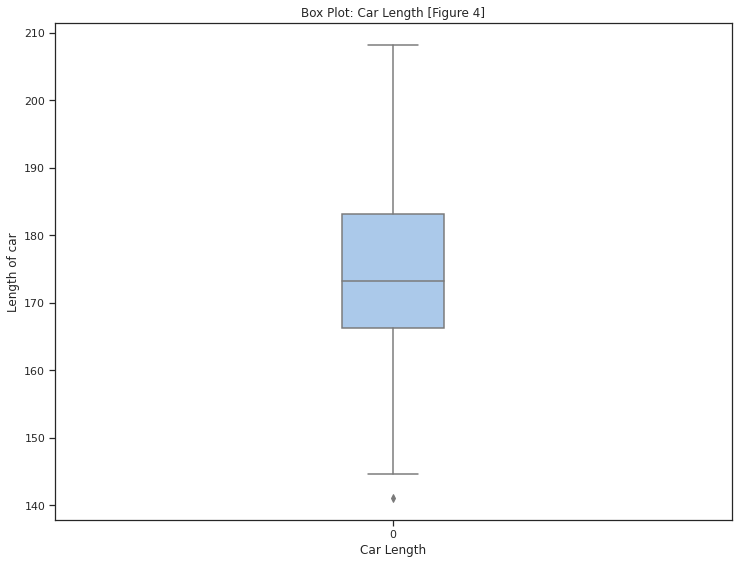

In [ ]:
#Plotting a box plot for Car Length.
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(122)
sns.boxplot(data=car_N['carlength'],palette='pastel',width=0.15,ax=ax)
ax.set_title('Box Plot: Car Length [Figure 4]')
ax.set_xlabel('Car Length')
ax.set_ylabel('Length of car')
plt.tight_layout()
plt.show()

Thus, from the above boxplot (Figure 4) of data of length of a car it is observed that there exists 1 outlier in the dataset.

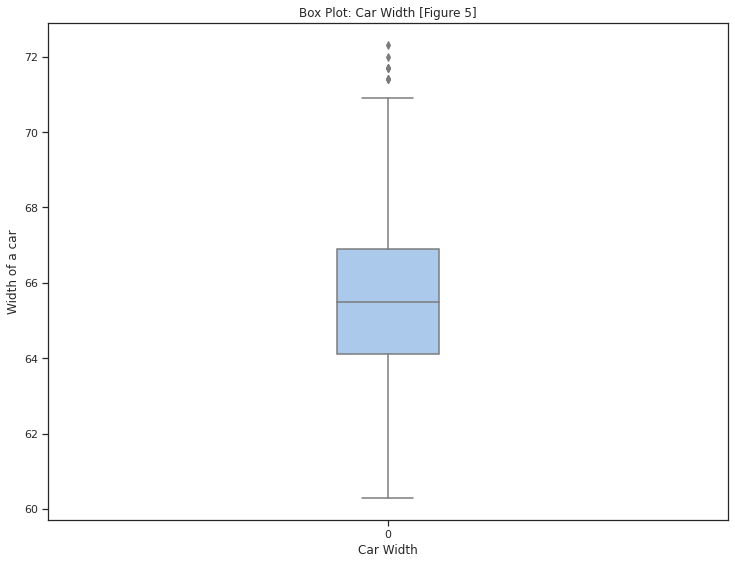

In [ ]:
#Plotting a box plot for Car Width.
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(122)
sns.boxplot(data=car_N['carwidth'],palette='pastel',width=0.15,ax=ax)
ax.set_title('Box Plot: Car Width [Figure 5]')
ax.set_xlabel('Car Width')
ax.set_ylabel('Width of a car')
plt.tight_layout()
plt.show()

Thus, from the above boxplot (Figure 5) of data of width of a car it is observed that there exists outliers in the dataset.

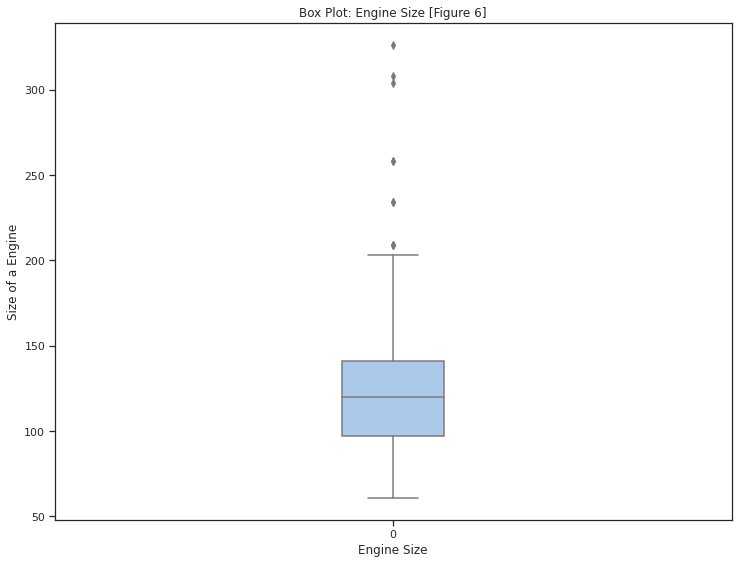

In [ ]:
#Plotting a box plot for Engine Size.
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(122)
sns.boxplot(data=car_N['enginesize'],palette='pastel',width=0.15,ax=ax)
ax.set_title('Box Plot: Engine Size [Figure 6]')
ax.set_xlabel('Engine Size')
ax.set_ylabel('Size of a Engine')
plt.tight_layout()
plt.show()

Thus, from the above boxplot (Figure 6) of data of engine size ofa car it is observed that there exists outliers in the dataset.

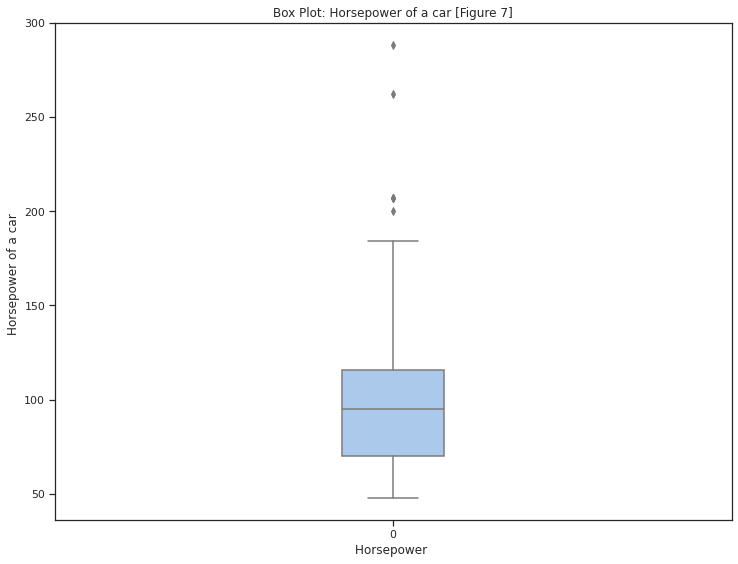

In [ ]:
#Plotting a box plot for Horsepower.
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(122)
sns.boxplot(data=car_N['horsepower'],palette='pastel',width=0.15,ax=ax)
ax.set_title('Box Plot: Horsepower of a car [Figure 7]')
ax.set_xlabel('Horsepower ')
ax.set_ylabel('Horsepower of a car ')
plt.tight_layout()
plt.show()

Thus, from the above boxplot (Figure 7) of data of horsepower of a car it is observed that there exists outliers in the dataset.

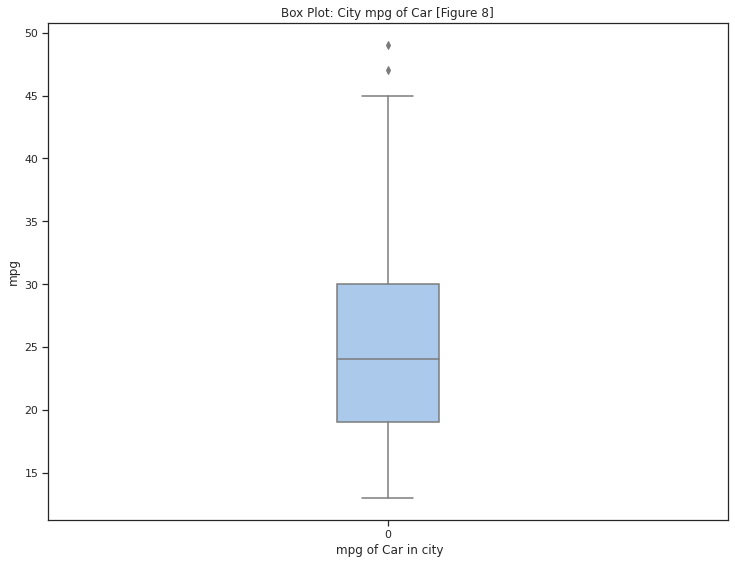

In [ ]:
#Plotting a box plot for City mpg of Car.
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(122)
sns.boxplot(data=car_N['citympg'],palette='pastel',width=0.15,ax=ax)
ax.set_title('Box Plot: City mpg of Car [Figure 8]')
ax.set_xlabel(' mpg of Car in city')
ax.set_ylabel('mpg')
plt.tight_layout()
plt.show()

Thus, from the above boxplot (Figure 8) of data mpg of a car in city it is observed that there exists outliers in the dataset.

**ANALYSIS**

In [ ]:
#importing train_test_split from the sklearn.model_selection library which will help us to split the
#data arrays into two subsets i.e. training data and testing data. 
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the datset into two subsets i.e. training data and testing data.
x_train,x_test,y_train,y_test=train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 10)

Thus, the dataset has been splitted into train and test data.

In [ ]:
#viewing the train data for all the independent variable.
x_train

,carlength,carwidth,enginesize,horsepower,citympg
160,166.3,64.4,98,70,38
98,162.4,63.8,97,69,31
127,168.9,65.0,194,207,17
47,199.6,69.6,258,176,15
91,165.3,63.8,97,69,31
...,...,...,...,...,...
113,198.9,68.4,120,95,19
64,177.8,66.5,122,84,26
15,189.0,66.9,209,182,16
125,168.9,68.3,151,143,19


In [ ]:
#viewing the train data for car price.
y_train

160     7738.000
98      8249.000
127    34028.000
47     32250.000
91      6649.000
         ...    
113    16695.000
64     11245.000
15     30760.000
125    22018.000
9      17859.167
Name: price, Length: 164, dtype: float64

MODEL BUILDING

In [ ]:
#Importing statsmodels.api library from statsmodels package which is required to build the linear regression model.
import statsmodels.api as lm

In [ ]:
x_train_lm=lm.add_constant(x_train)

In [ ]:
#Now we next proceed to build the linear regression model using OLS present in the statsmodels.api.
model=lm.OLS(y_train,x_train_lm).fit()

In [ ]:
#Printing the parameter estimates.
model.params

const        -51572.613750
carlength        14.366451
carwidth        593.973591
enginesize      107.434131
horsepower       75.102814
citympg          78.998592
dtype: float64

Thus, the parameters β0 =  -51572.613750 β1 =  14.366451, β2 =  593.973591, β3 = 107.434131, β4 = 75.102814, and β5 =  78.998592 are obtained above.

In [ ]:
#Obtaining the summary of the fitted model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     177.8
Date:                Fri, 13 Aug 2021   Prob (F-statistic):           5.63e-63
Time:                        15:53:09   Log-Likelihood:                -1554.5
No. Observations:                 164   AIC:                             3121.
Df Residuals:                     158   BIC:                             3140.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.157e+04   1.38e+04     -3.748      0.000   -7.88e+04   -2.44e+04
carlength     14.3665     40.796      0.352      0.725     -66.209      94.942
carwidth     593.9736    253.221      2.346      0.020      93.839    1094.108
enginesize   107.4341     12.913      8.320      0.000      81.929     132.939
horsepower    75.1028     16.235      4.626      0.000      43.037     107.168
citympg       78.9986     79.245      0.997      0.320     -77.518     235.515
==============================================================================
Omnibus:                       10.672   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               17.936
Skew:                           0.306   Prob(JB):                     0.000127
Kurtosis:                       4.500   Cond. No.                     1.37e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Hence from the above summary of fitted regression model we get the following results,

1. We observe that the intercept is β0=-51572.613750 which means that when the independent variables i.e. the characterstics of cars is 0 the car price will be -51572 which is not possible since we cannot have car length or width etc. zero. Thus here the intercept does not have any physical meaning.

2. Next we observe that the regression coefficient associated with car length is β1=14.366451 which means that when the when the other independent variables are kept constant and car length increases by one unit the car price increases by 14.366451 amount.

3. Next we observe that the regression coefficient associated with car width is  β2=593.973591 which means that when the when the other independent variables are kept constant and car width increases by one unit the car price increases by  593.973591 amount.

4. Next we observe that the regression coefficient associated with horsepower is β3=75.1028 which means that when the when the other independent variables are kept constant and shorsepower of a car increases by one unit the car price increases by  75.1028 amount.

5. Next we observe that the regression coefficient associated with mpg of a car in city is  β4=78.998592 which means that when the when the other independent variables are kept constant and mpg of a car in city increases by one unit the car price increases by 78.998592 amount.


6. Hence the fitted simple linear regression model is,
             y=β0+(β1*x1)+(β2*x2)+(β3*x3)+(β4*x4)+(β5*x5)
y=-51572.613750+(14.366451*x1)+(593.973591*x2)+(107.434131*x3)+(78.998592*x4)+(107.434131*x5)

car price=-51572.613750+(14.366451*carlength)+(593.973591*carwidth)+(107.434131*engine size)+(78.998592*horsepower)+(107.434131*citympg)
             
7. From the above summary Also we observe that the adjusted rsquare value that is coefficient of determination is 0.844 which idicates that our model is a good fit i.e.it is a good model and that the indepent variable explains the car price well.

In [ ]:
#Calculation of VIF nad checking multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns
  

In [ ]:
#Obtaining the table of variance inflation factor.
vif.round(1)

,VIF Factor,features
0,765.0,carlength
1,1092.0,carwidth
2,36.2,enginesize
3,45.0,horsepower
4,53.3,citympg


Thus, we observe that the vif associated with each regresseor variable is really high hence we can say that there exists multicolinearity between the independent variables.

Obtaining the partial regression plot with respect to each of the regressor variables.

Text(0.5, 1.0, '[Figure 9]')

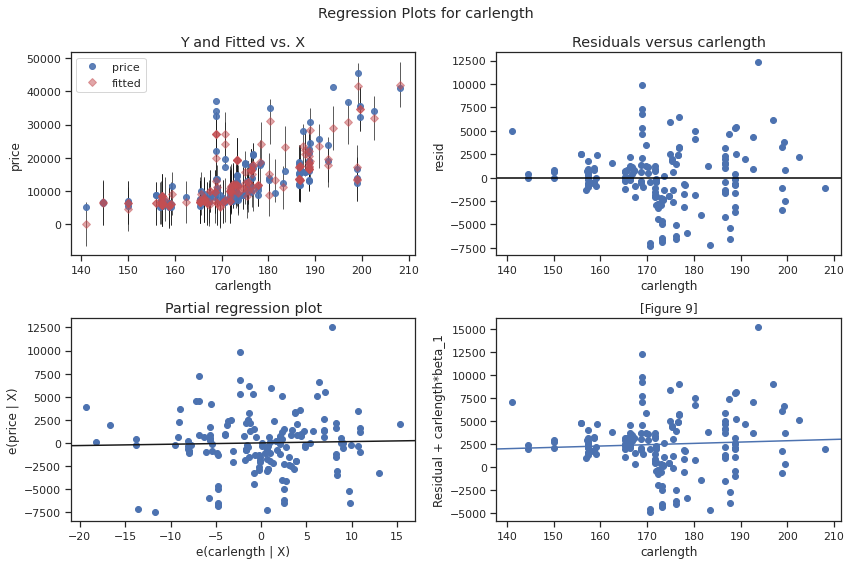

In [ ]:
#create residual vs. predictor plot for 'carlength'
fig = plt.figure(figsize=(12,8))
fig = lm.graphics.plot_regress_exog(model, 'carlength', fig=fig)
plt.title("[Figure 9]")

Thus, the fitted regression line between car price and car length is obtained and we conclude that the variables are positively correlated.

Text(0.5, 1.0, '[Figure 10]')

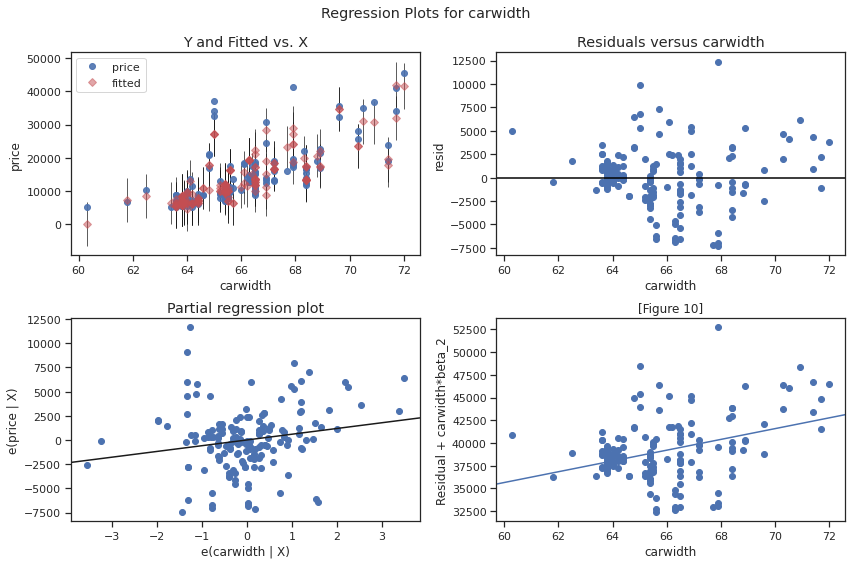

In [ ]:
#create residual vs. predictor plot for 'carwidth'
fig = plt.figure(figsize=(12,8))
fig = lm.graphics.plot_regress_exog(model, 'carwidth', fig=fig)
plt.title("[Figure 10]")

Thus, the fitted regressionline between car price and car width is obtained and we conclude that the variables are positively correlated.

Text(0.5, 1.0, '[Figure 11]')

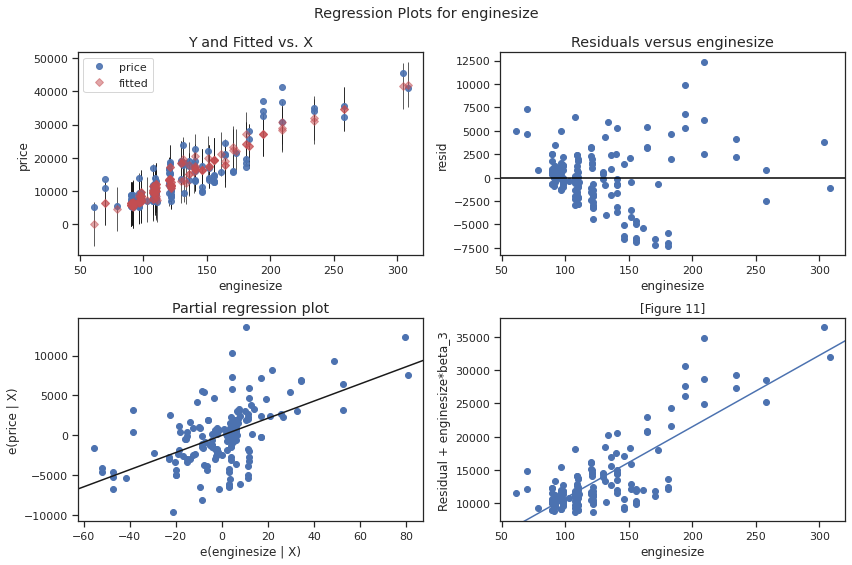

In [ ]:
#create residual vs. predictor plot for 'enginesize'
fig = plt.figure(figsize=(12,8))
fig = lm.graphics.plot_regress_exog(model, 'enginesize', fig=fig)
plt.title("[Figure 11]")

Thus, the fitted regressionline between car price and engine size is obtained and we conclude that the variables are positively correlated.

Text(0.5, 1.0, '[Figure 12]')

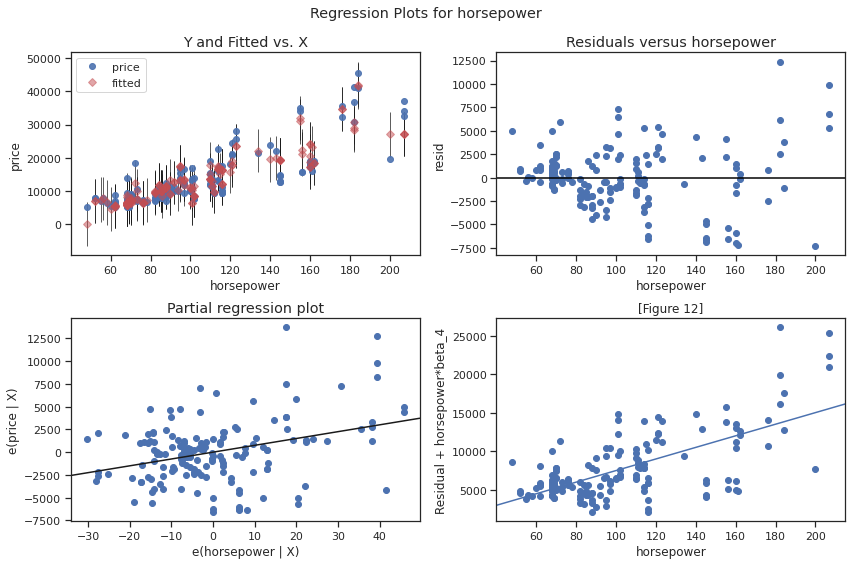

In [ ]:
#create residual vs. predictor plot for 'horsepower'
fig = plt.figure(figsize=(12,8))
fig = lm.graphics.plot_regress_exog(model, 'horsepower', fig=fig)
plt.title("[Figure 12]")

Thus, the fitted regressionline horsepower is obtained and we conclude that the variables are positively correlated.

Text(0.5, 1.0, '[Figure 13]')

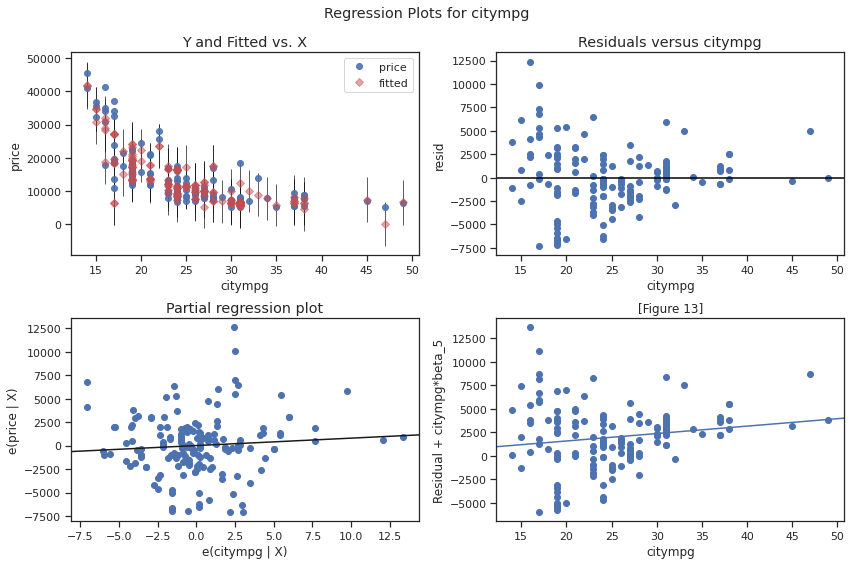

In [ ]:
#create residual vs. predictor plot for 'citympg'
fig = plt.figure(figsize=(12,8))
fig = lm.graphics.plot_regress_exog(model, 'citympg', fig=fig)
plt.title("[Figure 13]")

Thus, the fitted regression between car price and car mpg line is obtained and we conclude that the variables are positively correlated.

RESIDUAL ANALYSIS

Now, since we have the built regression model, now we check the goodness of fit by validating the assumptions associated with the fitted model.
The following are the assumtions regarding the fitted model,
1.	The relationship beetween y and x1,x2,…x5 is linear.
2.	Errors have zero mean.
3.	Assumption of homoscedasticity, i.e. the errors have   constant variance.
4.	Errors are uncorrelated.
5.	Errors are normally distributed random variables.


**To check if the relationship beetween y and x1, x2, x3, x4, and x5 is linear.**

From the scatter plot matrix i.e. figure 1 obtained above we can conclude that the relationship between y and x1, x2, x3, x4, and x5 is linear.

In [ ]:
#Obtaining residuals corresponding to the fitted regression model.
y_train_pred = model.predict(x_train_lm)
resid = (y_train - y_train_pred)
resid

160    -118.114639
98     1540.825761
127    6834.356702
47    -2506.571845
91     -100.836947
          ...     
113    3254.496694
64     -705.548818
15     2494.098192
125    2132.494426
9      -813.426569
Length: 164, dtype: float64

Thus, residual of the fitted model are obtained above.

 **To check if the mean of the residuals is 0.**

In [ ]:
#Obtaining the mean of the residuals
import statistics
statistics.mean(resid)

-1.490129429063328e-11

From the above calculation we observe that mean of residuals is 0 hence it can be concluded that the errors has mean zero.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


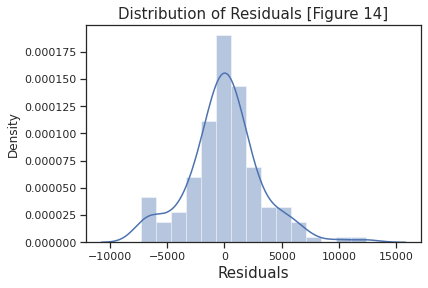

In [ ]:
#Obtaining the distribution plot of residuals.
fig = plt.figure()
sns.distplot(resid, bins = 15)
plt.title('Distribution of Residuals [Figure 14]', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)
plt.show()

Thus, we obtained the histogram we observe from the above (Figure 14) that the histogram  is symmetric and errors are normally distributed.

**To check assumption of homscedasticity i.e. variance of residuals is constant.**

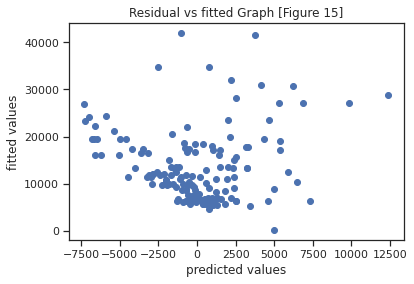

In [ ]:
#Obtaining the scatterplot between predicted values and residuals 
plt.scatter(resid, y_train_pred)
plt.title("Residual vs fitted Graph [Figure 15]")
plt.xlabel("predicted values")
plt.ylabel("fitted values")
plt.show()

Thus, from the figure 15 it is observed that the points are randomly scattered over the plot hence we conclude that the errors have constant variance.

**To check if the errors are uncorrelated.**

From the model summar obtained above in the analysis section it is observed that the durbin watson statistics is 1.993 which means that the errors are un correlated. Hence, this assumption is also satisfied.

**To check normality assumption i.e to check if the residuals are normally distributed.**

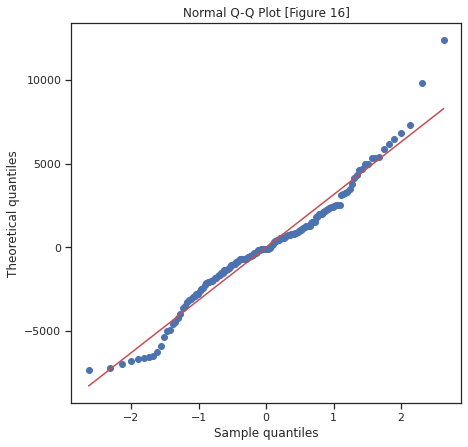

In [ ]:
#Obtaining the Q-Q plot to check for the normality assumption.
import scipy.stats as stats
plt.figure(figsize=(7,7))
stats.probplot(resid, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot [Figure 16]")
plt.xlabel("Sample quantiles")
plt.ylabel("Theoretical quantiles")
plt.show()

Thus it is observed in the above figure (figure 16 ) that the points almost aligned to the staright line hence we can conclude that the errors are normallly distributed.

Thus, we observe that all the assumptions about errors are satisfied and hence we can say that our model is a good fit.

PREDICTION USING TEST DATA

In [ ]:
#Predicting the hospital discharge cost using the test data.
x_test_lm = lm.add_constant(x_test)
y_test_pred = model.predict(x_test_lm)
y_test_pred

131    13283.542150
117    18160.746760
63     11238.478450
56      6328.130861
49     48843.416245
60     11950.548818
19      6372.051626
171    16216.698288
163     6942.017360
203    17657.363330
5      14728.331741
173    12756.760914
159     8093.884817
114    17352.387060
129    38677.577509
101    22741.195768
61     11950.548818
116    17414.112134
1      12887.970217
2      19188.987444
35      6750.885859
10     10462.101489
167    16216.698288
178    23318.403477
6      17978.840398
75     21065.309388
99     11955.637679
20      6413.714333
39     10083.898310
102    22782.858475
95      6754.146882
154     5315.369890
52      6178.646785
58      9876.969265
70     24561.996874
68     23562.346371
46     11073.994913
103    22940.855658
147    10403.353839
76      6853.007573
176    12598.763731
dtype: float64

Thus, we obtained above the predicted car price for the given test data.

**CONCLUSION**

Thus, from the above analysis it is observed that since the adjusted coefficient of determintion is 0.84 and all the assumptions about errors are satisfied therefore the multiple linear regression model that is fitted to predict the car price of an chinese automobile company based on the various characterstics of a car is a good fit. We observe that adjusted coefficient of determintion is 0.84 which is quite high and which means that this model explains about 84% of variability in the dependent variable.

Thus, the multiple linear regression model obtained above is good to predict the car price based on car width, car length, engine sie, hor power and mpg of a car.